## Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
 
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
wine=pd.read_csv("wine.csv")

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
wine.shape

(178, 14)

In [6]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [10]:
corr_matrix=wine.corr()

In [11]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot:>

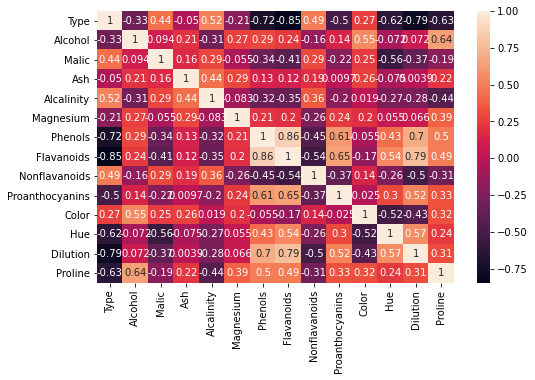

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(wine.corr(),annot=True)

In [14]:
corr_matrix['Type'].sort_values(ascending=False)

Type               1.000000
Alcalinity         0.517859
Nonflavanoids      0.489109
Malic              0.437776
Color              0.265668
Ash               -0.049643
Magnesium         -0.209179
Alcohol           -0.328222
Proanthocyanins   -0.499130
Hue               -0.617369
Proline           -0.633717
Phenols           -0.719163
Dilution          -0.788230
Flavanoids        -0.847498
Name: Type, dtype: float64

## By seeing the corelation matrix , we observe that Alcalinity  ,Nonflavanoids and Malic have high correlation with label data (type of wine ) and Phenols -0.719163,Dilution          -0.788230,Flavanoids        -0.847498 has high non -relation

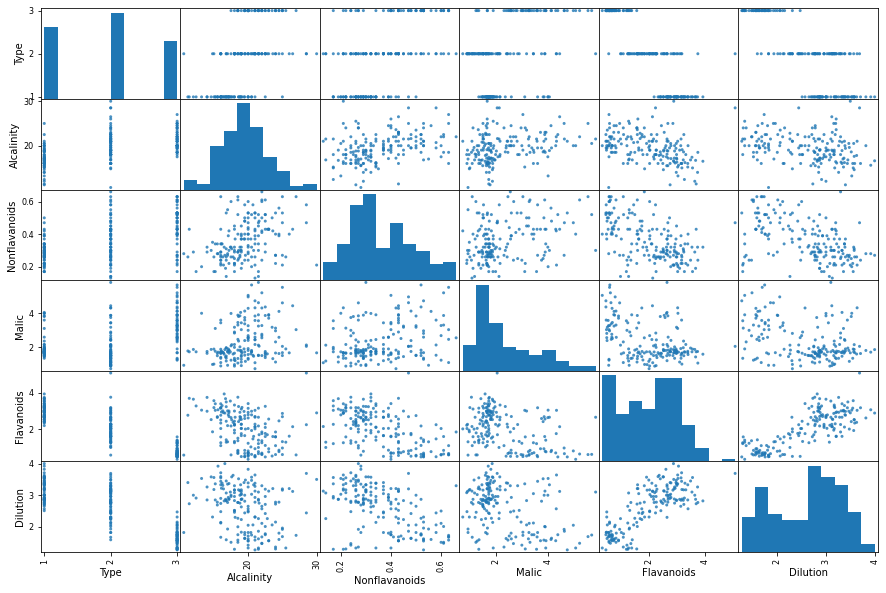

In [15]:
attributes = ['Type','Alcalinity','Nonflavanoids','Malic','Flavanoids','Dilution']
scatter_matrix(wine[attributes],alpha=0.8,figsize=(15,10))
plt.show()

(array([13., 24., 14., 12., 12., 32., 28., 25., 15.,  3.]),
 array([1.27 , 1.543, 1.816, 2.089, 2.362, 2.635, 2.908, 3.181, 3.454,
        3.727, 4.   ]),
 <BarContainer object of 10 artists>)

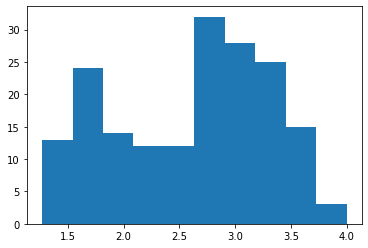

In [16]:
plt.hist('Dilution',data=wine)

(array([33., 18., 23., 20., 32., 32., 14.,  5.,  0.,  1.]),
 array([0.34 , 0.814, 1.288, 1.762, 2.236, 2.71 , 3.184, 3.658, 4.132,
        4.606, 5.08 ]),
 <BarContainer object of 10 artists>)

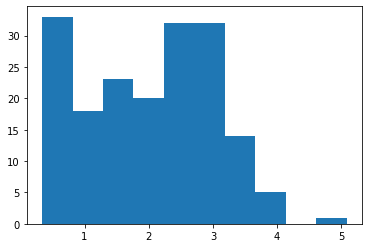

In [17]:
plt.hist('Flavanoids',data=wine)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dilution', ylabel='Flavanoids'>

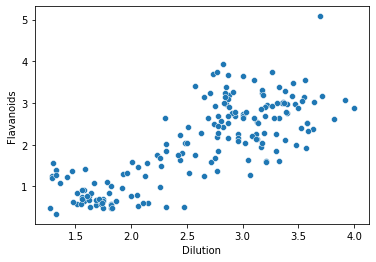

In [18]:

sns.scatterplot(wine['Dilution'],wine['Flavanoids'])

## MOdel BuiIding Before PCA 

In [19]:
y=wine['Type']
x=wine.drop('Type',axis=1)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=142,stratify=y)

In [21]:
x_train.shape,y_train.shape

((137, 13), (137,))

In [22]:
x_test.shape,y_test.shape

((41, 13), (41,))

In [23]:
DT_classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=142,)

In [24]:
DT_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=142)

In [25]:
test_pred=DT_classifier.predict(x_test)

In [26]:
accuracy_score(y_test,test_pred)

0.926829268292683

In [27]:
confusion_matrix(y_test,test_pred)

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  2,  9]], dtype=int64)

In [28]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.88      0.94      0.91        16
           3       0.90      0.82      0.86        11

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.92        41
weighted avg       0.93      0.93      0.93        41



## MOdel Buliding AFter PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [30]:
std_scale = StandardScaler()

In [31]:
scaled_x = std_scale.fit_transform(x)
scaled_x=pd.DataFrame(scaled_x,columns=x.columns)
scaled_x


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [32]:
pca= PCA(n_components=3)
pca_components = pca.fit_transform(scaled_x)
pca_x=pd.DataFrame(pca_components,columns=['PC1','PC2','PC3'])
pca_x

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [33]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

# Cummulative variance of each PCA

In [34]:

var1=np.cumsum(np.round(var,4)*100)
var1

array([36.2 , 55.41, 66.53])

# Variance plot for PCA components obtained 

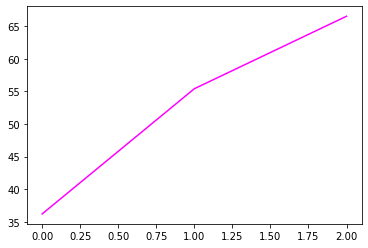

In [35]:

plt.plot(var1,color='magenta')

In [36]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(n_components=3)>

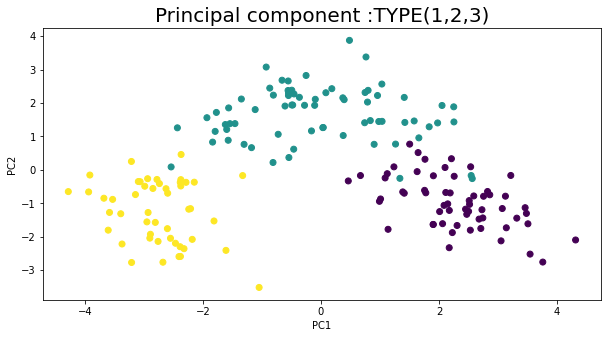

In [37]:
plt.figure(figsize=(10,5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal component :TYPE(1,2,3)',size=20)

plt.scatter(x='PC1',y='PC2',data=pca_x,c=y)

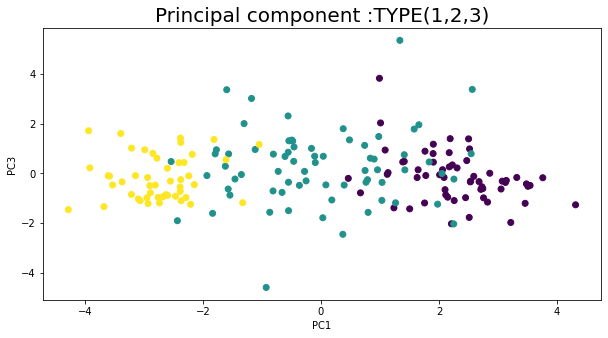

In [38]:
plt.figure(figsize=(10,5))
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Principal component :TYPE(1,2,3)',size=20)

plt.scatter(x='PC1',y='PC3',data=pca_x,c=y)

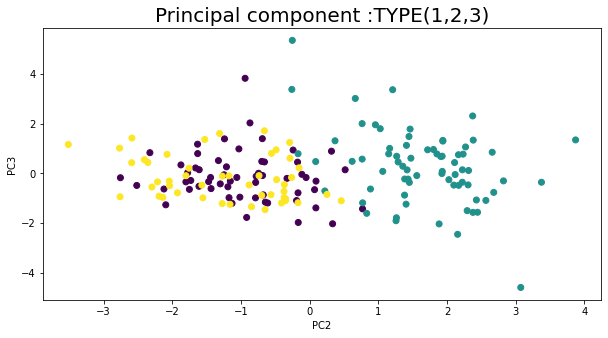

In [39]:
plt.figure(figsize=(10,5))
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('Principal component :TYPE(1,2,3)',size=20)

plt.scatter(x='PC2',y='PC3',data=pca_x,c=y)

In [40]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

## MOdel Trainig After PCA

In [41]:
x_train,x_test,y_train,y_test=train_test_split(pca_x,y,test_size=0.23,random_state=142,stratify=y)

In [42]:
x_train.shape,y_train.shape

((137, 3), (137,))

In [43]:

x_test.shape,y_test.shape

((41, 3), (41,))

In [44]:
dt_model =DecisionTreeClassifier(criterion='gini',max_depth=4)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [45]:
y_pred_train = dt_model.predict(x_train)

In [46]:
print('Accuracy score:',accuracy_score(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy score: 0.9927007299270073
confusion matrix:
 [[45  0  0]
 [ 1 54  0]
 [ 0  0 37]]


In [47]:
y_pred_test =dt_model.predict(x_test)

In [48]:
print('Accuracy score:',accuracy_score(y_pred_test,y_test))
print('confusion matrix:\n',confusion_matrix(y_pred_test,y_test))

Accuracy score: 0.9512195121951219
confusion matrix:
 [[13  0  0]
 [ 1 15  0]
 [ 0  1 11]]


In [49]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       0.94      0.94      0.94        16
           3       1.00      0.92      0.96        12

    accuracy                           0.95        41
   macro avg       0.96      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



### NOW we  analysis and perform clustering using first 3 principal component scores

In [50]:
from sklearn.cluster import DBSCAN,AgglomerativeClustering,KMeans
import scipy.cluster.hierarchy as sch

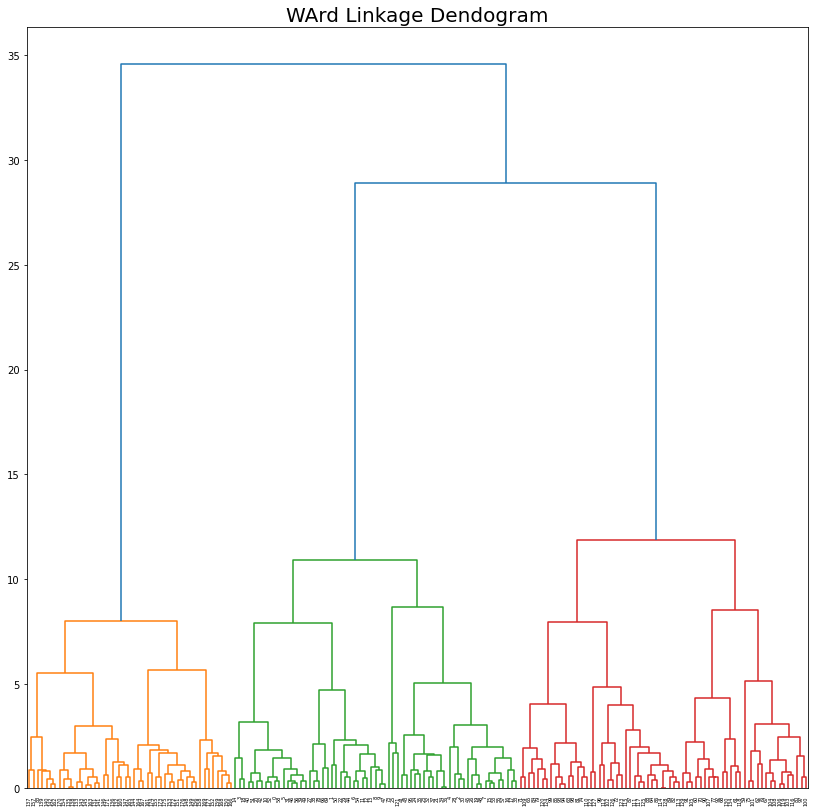

In [51]:
fig = plt.figure(figsize = (14,14))
dendogram = sch.dendrogram(sch.linkage(pca_x, method = 'ward'))
plt.title('WArd Linkage Dendogram', size = 20)
plt.show()


In [52]:
h_cluster= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [53]:
y_hc=h_cluster.fit_predict(pca_x)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [54]:
pca_x['cluster']=y_hc

In [55]:
pca_x.head()

,PC1,PC2,PC3,cluster
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [56]:
pca_x.sort_values(by=['cluster'])

,PC1,PC2,PC3,cluster
88,-1.115111,1.802247,0.959253,0
79,0.376150,1.027043,1.794466,0
113,-0.457072,2.269416,1.061339,0
77,-1.457377,1.383352,-0.227307,0
76,0.370014,2.153907,-2.449386,0
...,...,...,...,...
36,1.384862,-0.658640,0.458439,2
35,1.903826,-0.176711,0.450835,2
34,1.410389,-0.697934,0.479743,2
48,2.009851,-1.247029,-0.057294,2


cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

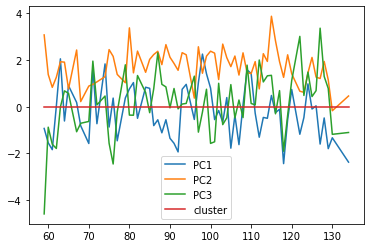

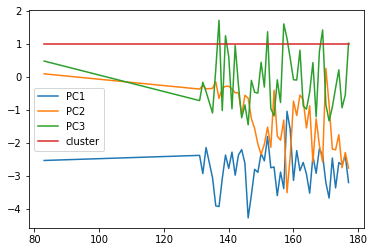

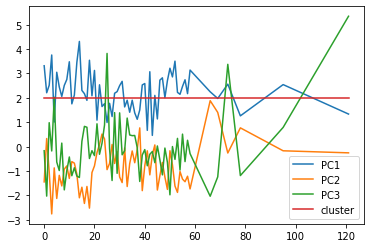

In [57]:
pca_x.groupby(by='cluster').plot().T

In [58]:
pca_x.drop('cluster',axis=1)

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


## BY using Kmeans Clutering

In [59]:
scaled_x.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [60]:
pca_x.drop('cluster',axis=1,inplace=True)

In [61]:
pca_x

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [62]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

## DBSCAN clustring

In [ ]:
dbscan= DBSCAN(eps=1)


In [ ]:
dbscan.fit_predict(pca_x)

In [ ]:
dbscan.components_

In [ ]:
labels=dbscan.labels_

In [ ]:
dbscan.get_params()

In [ ]:

from sklearn import metrics


In [ ]:
sample_cores=np.zeros_like(labels,dtype=bool)

In [ ]:
sample_cores

In [ ]:
sample_cores[dbscan.core_sample_indices_]=True


In [ ]:

n_clusters=len(set(labels))- (1 if -1 in labels else 0)


In [ ]:
n_clusters

In [ ]:
print(metrics.silhouette_score(pca_x,labels))